In [1]:
# A notebook for simple lstm exploration
import torch.nn as nn
from torch.autograd import Variable 
import torch
from core_functions import SensorSignals
dataPath = "./second_collection_triggs_rels_32.npz"
S = SensorSignals(dataPath)  
S.split_data()
S.norm_X()
S.setup_tensors()
S.print_shapes()

(1, 1, 1)
Normalizing dataset from [3.06895569] to
[1.]
Normalizing dataset from [3.07249511] to
[1.0011533]
Normalizing dataset from [3.0693023] to
[1.00011294]
Using Device:  cpu , dtype:  torch.float32
Raw data shape:  (7497, 1, 32)
Labels shape:  (7497,)
Unique labels:  [0 1 2]
Shape of test set: (1125, 1, 32)
Shape of train set: (5416, 1, 32)
Shape of validation set: (956, 1, 32)
Fraction of single class in test set:  0.31377777777777777
dtype of inputs:  torch.float32


In [2]:
class lstm(nn.Module):
    def __init__(self):
        super(lstm, self).__init__()
        
        torch.manual_seed(180200742)    # Set seed for same initialization of weigths each time

        self.input_size = 4 
        self.hidden_dim = 64 
        self.out_size = 5
        self.num_layers = 1

        # shape of input ()
        self.lstm = nn.LSTM(self.input_size, self.hidden_dim, num_layers=self.num_layers, batch_first=True)
        self.fc = nn.Linear(self.hidden_dim, self.out_size)
        # self.sigmoid = nn.Sigmoid()
        self.relu = nn.ReLU()
        
    def forward(self, x):
        batch_size = x.size(0)
        x = x.reshape((x.shape[0], int(x.shape[2]/self.input_size), self.input_size))

        # # Initialize hidden state
        # h_0 = Variable(torch.zeros(self.num_layers, batch_size, self.hidden_dim)) #hidden state
        # c_0 = Variable(torch.zeros(self.num_layers, batch_size, self.hidden_dim)) #internal state

        # Propagate input through LSTM
        # print("input: ", x.shape)
        lstm_out, _ = self.lstm(x) #lstm with input, hidden, and internal state
        # print("out lstm: ", lstm_out.shape)

        lstm_out = lstm_out[:, -1, :]    # Choose final output of lstm for classification
        # shape (batch_size, n_classes)

        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(lstm_out)
        out = self.relu(out)
        out = out.view(batch_size, -1)

        # print("output shape: ", out.shape)
        return out 
 

models = [lstm()]
S.train_multiple_models(models, learning_rate=1e-2, weight_decay=1e-3, batch_size=2*256, max_epochs=200)

Epoch 1, Batch 1: loss_tr=1.701, loss_val=1.567, train=33.8%, val=36.7%
Epoch 2, Batch 1: loss_tr=1.421, loss_val=1.416, train=33.8%, val=36.7%
Epoch 3, Batch 1: loss_tr=1.419, loss_val=1.391, train=41.4%, val=43.8%
Epoch 4, Batch 1: loss_tr=1.459, loss_val=1.321, train=47.1%, val=50.0%
Epoch 5, Batch 1: loss_tr=1.320, loss_val=1.293, train=47.8%, val=50.9%
Epoch 6, Batch 1: loss_tr=1.081, loss_val=1.053, train=49.1%, val=50.8%
Epoch 7, Batch 1: loss_tr=0.956, loss_val=0.913, train=50.6%, val=53.3%
Epoch 8, Batch 1: loss_tr=0.892, loss_val=0.897, train=54.2%, val=53.9%
Epoch 9, Batch 1: loss_tr=0.881, loss_val=0.884, train=54.7%, val=53.5%
Epoch 10, Batch 1: loss_tr=0.926, loss_val=0.885, train=54.9%, val=54.0%
Epoch 11, Batch 1: loss_tr=0.883, loss_val=0.870, train=53.4%, val=54.7%
Epoch 12, Batch 1: loss_tr=1.060, loss_val=0.867, train=58.5%, val=56.8%
Epoch 13, Batch 1: loss_tr=0.871, loss_val=0.874, train=55.9%, val=55.0%
Epoch 14, Batch 1: loss_tr=0.864, loss_val=0.850, train=57.4

Epoch 114, Batch 1: loss_tr=0.378, loss_val=0.435, train=80.4%, val=80.6%
Epoch 115, Batch 1: loss_tr=0.342, loss_val=0.404, train=82.0%, val=83.1%
Epoch 116, Batch 1: loss_tr=0.372, loss_val=0.399, train=81.6%, val=83.3%
Epoch 117, Batch 1: loss_tr=0.432, loss_val=0.397, train=81.6%, val=83.1%
Epoch 118, Batch 1: loss_tr=0.499, loss_val=0.409, train=81.1%, val=83.1%
Epoch 119, Batch 1: loss_tr=0.373, loss_val=0.369, train=83.4%, val=85.4%
Epoch 120, Batch 1: loss_tr=0.414, loss_val=0.403, train=81.7%, val=83.1%
Epoch 121, Batch 1: loss_tr=0.405, loss_val=0.381, train=83.6%, val=84.6%
Epoch 122, Batch 1: loss_tr=0.390, loss_val=0.360, train=84.0%, val=85.9%
Epoch 123, Batch 1: loss_tr=0.428, loss_val=0.378, train=82.8%, val=84.2%
Epoch 124, Batch 1: loss_tr=0.630, loss_val=0.390, train=82.6%, val=83.4%
Epoch 125, Batch 1: loss_tr=0.429, loss_val=0.415, train=81.4%, val=85.0%
Epoch 126, Batch 1: loss_tr=0.418, loss_val=0.371, train=83.3%, val=86.1%
Epoch 127, Batch 1: loss_tr=0.395, los

Accuracy of test set of best model (idx=0): 87.3%


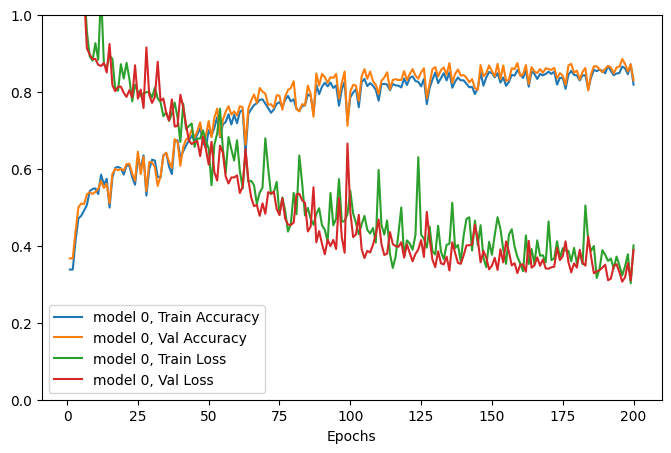

In [3]:
S.plot_train()
S.bestModelAcc()

In [ ]:
import numpy as np

A = np.arange(32).reshape((8,4))
print(A)